In [2]:
# mv this notebook in src folder
# or
# set sys path to src folder
import os, sys
path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [3]:
import plot
from read_chroma import read_only_chroma, read_chromato_and_chromato_cube

In [6]:
path='D:/cdf centroid/'
file='A-F-028-817822-droite-ReCIVA.cdf'

In [11]:
chromato, time_rn= read_only_chroma(path+file, mod_time = 1.7)

# Plot chromatogram

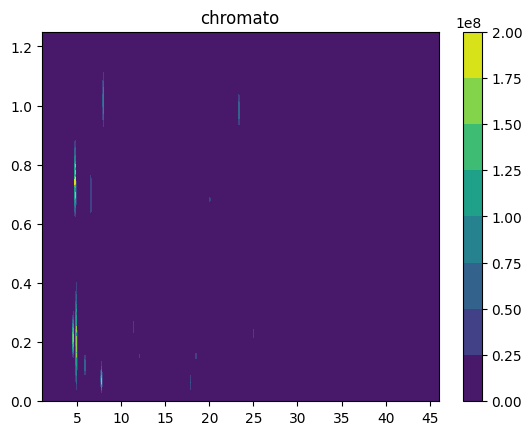

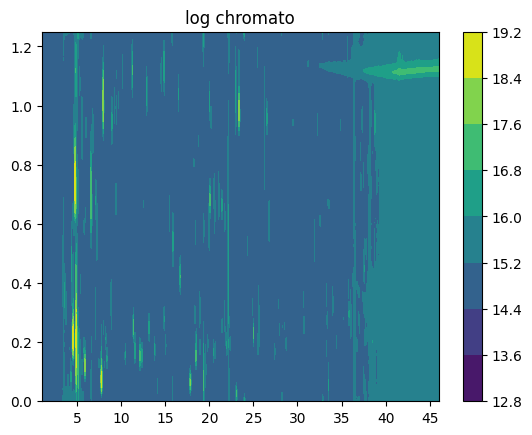

In [12]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False)
plot.visualizer((chromato, time_rn), title="log chromato")

Zoom around matrix or chromatogram coordinate

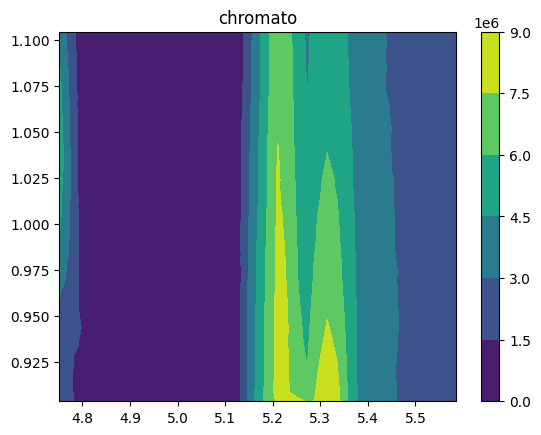

In [49]:
# zoom around matrix coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

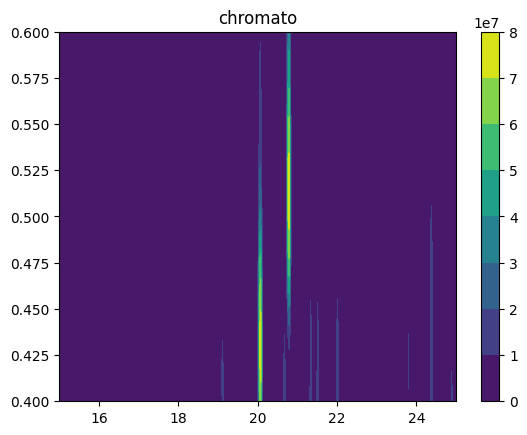

In [52]:
# zoom around chromatogram coordinate
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)

Plot 3D chromatogram (intensities as third coordinates)

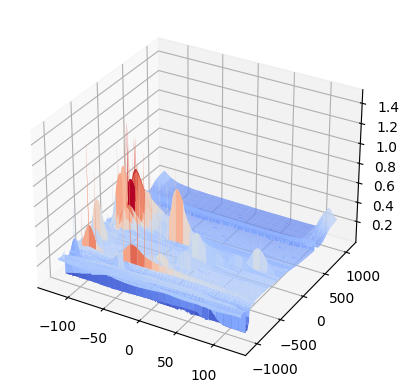

In [21]:
# plot with strides (faster)
plot.plot_3d_chromato(chromato)

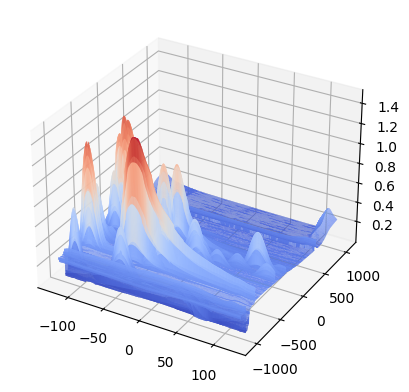

In [20]:
# plot without strides (slower but more precise)
plot.plot_3d_chromato(chromato, rstride=1, cstride=1)

# Plot peaks

In [37]:
#package modules
from read_chroma import read_chromato_and_chromato_cube
from peak_detection import peak_detection
from identification import compute_matches_identification, cohort_identification_alignment_input_format_txt, cohort_identification_to_csv
from matching import matching_nist_lib_from_chromato_cube
from utils import get_name_dict
import projection
###
import numpy as np

In [27]:
chromato, time_rn, chromato_cube, sigma, mass_range=read_chromato_and_chromato_cube(path+file, mod_time=1.25, pre_process=True)

chromato readed 14.760844230651855 s
--- 269.05638909339905 seconds --- to compute full spectra centroid
full spectra computed 272.1965687274933 s
baseline corrected


In [28]:
seuil=5
MIN_SEUIL = seuil * sigma * 100 / np.max(chromato)
# detect peaks
coordinates = peak_detection((chromato, time_rn, None), None, chromato_cube, MIN_SEUIL, None)
len(coordinates)

In [31]:
# project the coordinates
coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, 1.25, chromato.shape)

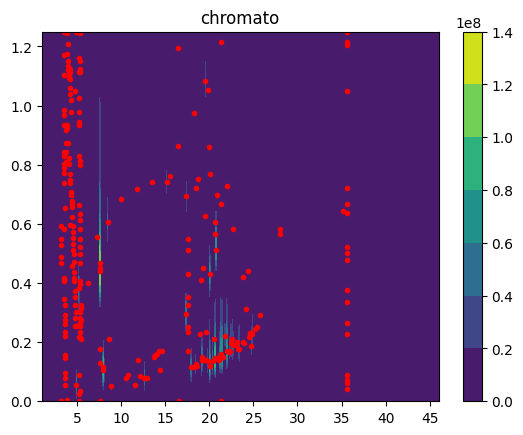

c:\Users\Stan\pic\plot.py:353: RuntimeWarning: divide by zero encountered in log
  chromato = np.log(chromato)


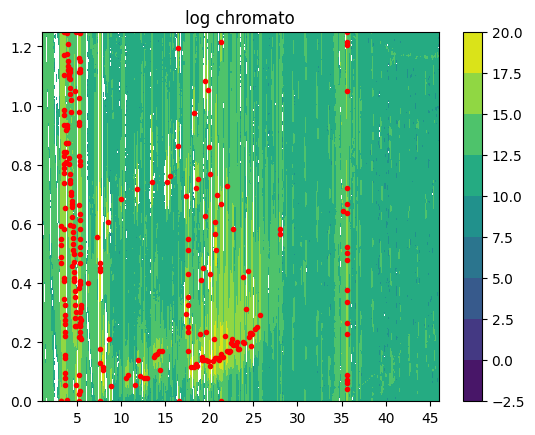

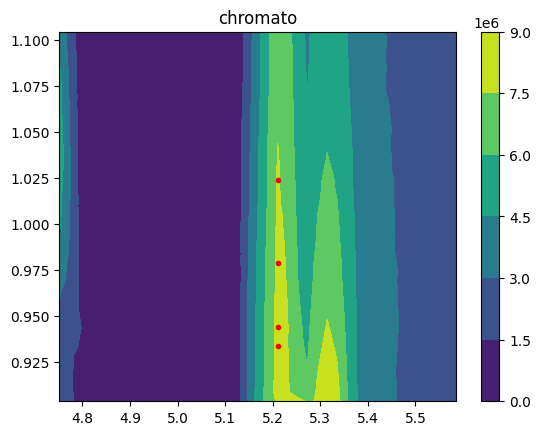

In [53]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [36]:
hit_prob_min=0
match_factor_min=0
# 2D peaks identification with NIST datanase
matches = matching_nist_lib_from_chromato_cube((chromato, time_rn, mass_range), chromato_cube, coordinates, mod_time = 1.25, hit_prob_min=hit_prob_min, match_factor_min=match_factor_min)

nb_peaks:  262


c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Butane �,�-oxide: [-32, -21].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Butylene oxide: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string (�)-2-Ethyloxirane: [-15].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: Use

nb match:
262


c:\Users\Stan\pic\matching.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)


In [41]:
# group coordinates by casno
casnos_dictall = get_name_dict(matches)

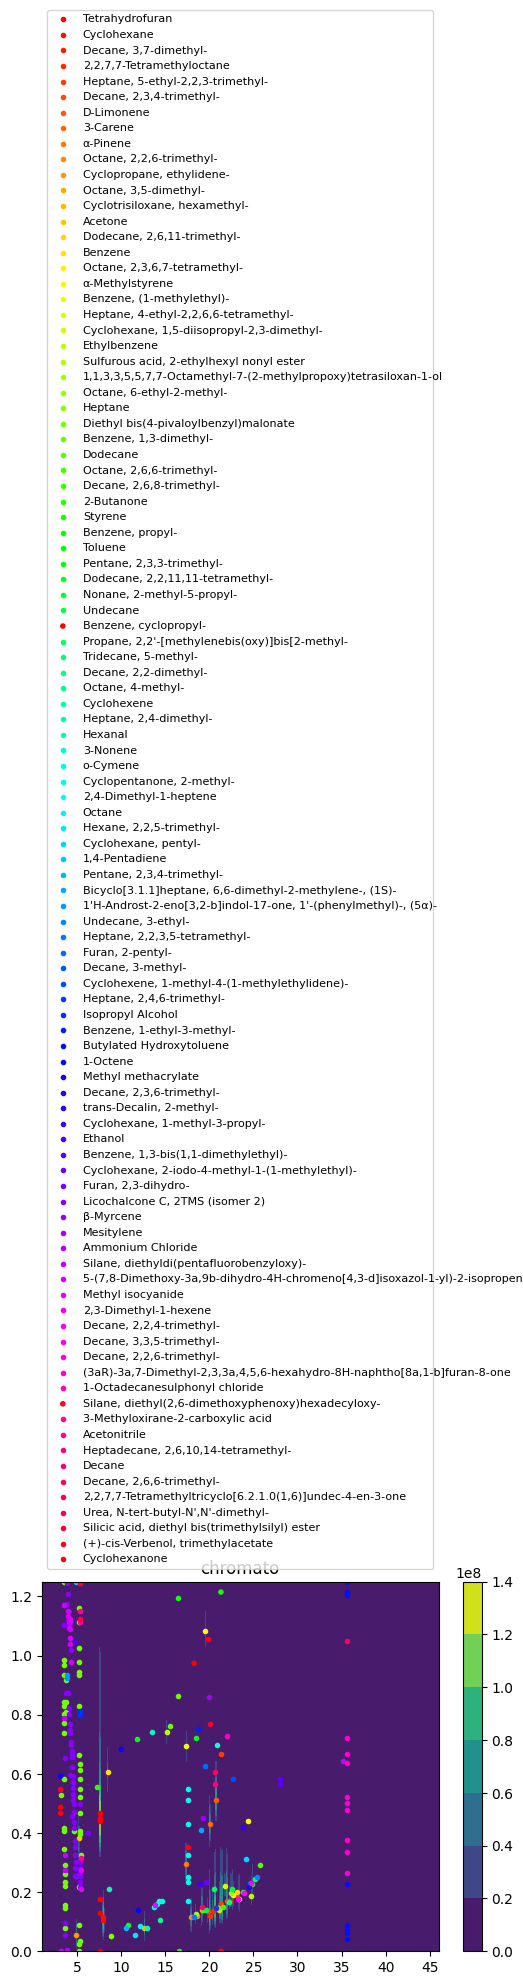

c:\Users\Stan\pic\plot.py:356: RuntimeWarning: divide by zero encountered in log
  


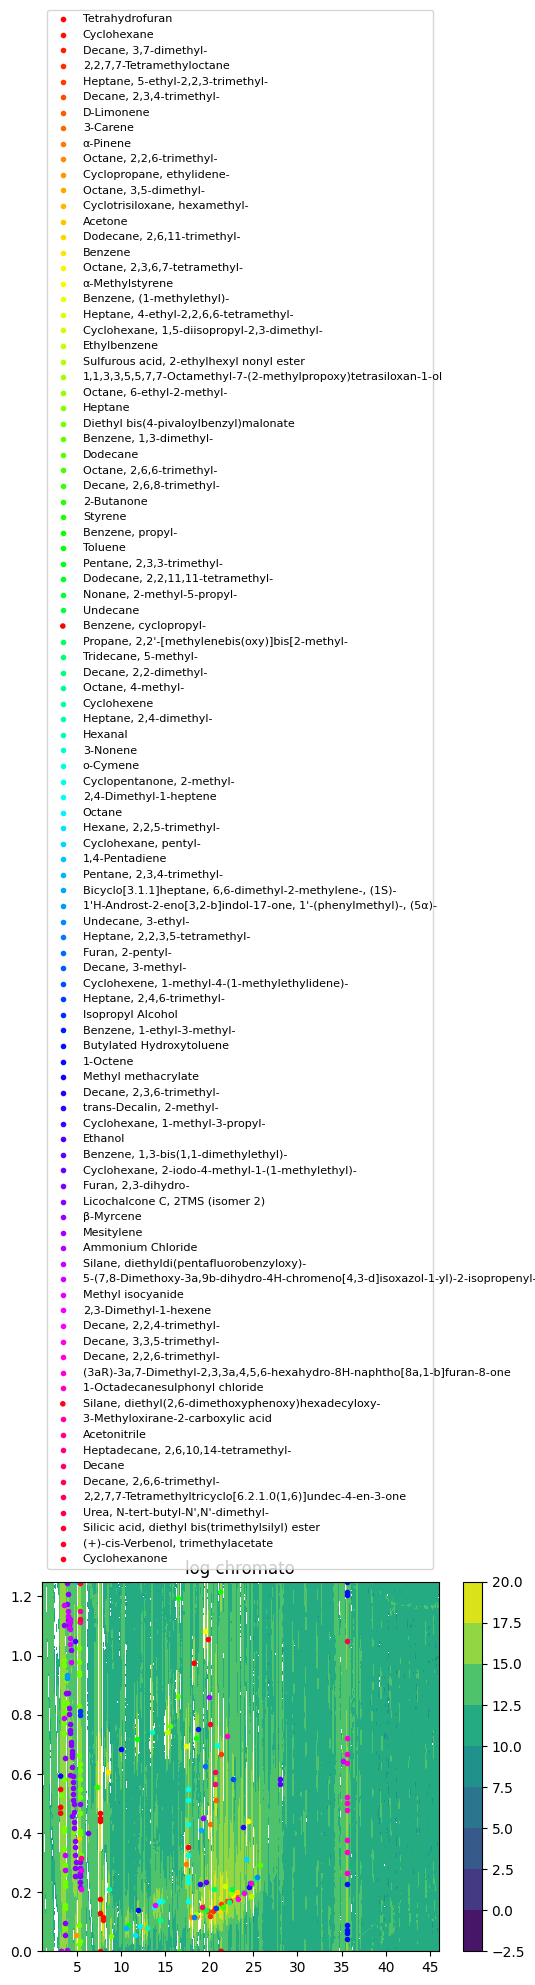

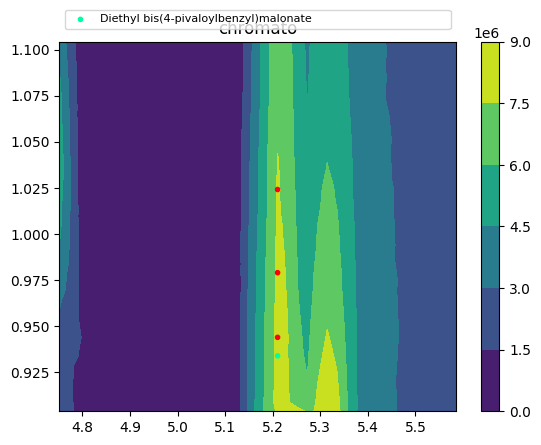

In [156]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato, casnos_dict=casnos_dictall)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [160]:
import importlib
importlib.reload(plot)

<module 'plot' from 'c:\\Users\\Stan\\pic\\plot.py'>

Diethyl bis(4-pivaloylbenzyl)malonate
Diethyl bis(4-pivaloylbenzyl)malonate
Diethyl bis(4-pivaloylbenzyl)malonate
Diethyl bis(4-pivaloylbenzyl)malonate
----
['Diethyl bis(4-pivaloylbenzyl)malonate']


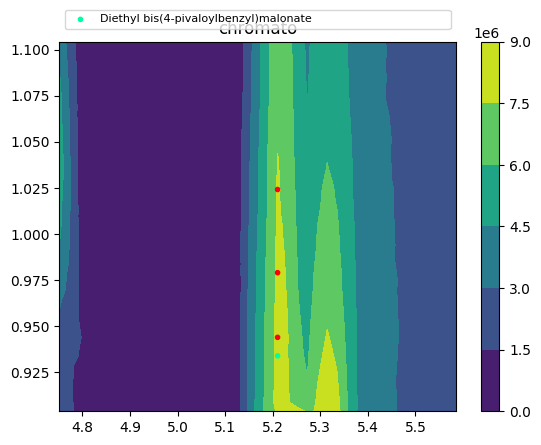

In [164]:
import importlib
importlib.reload(plot)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

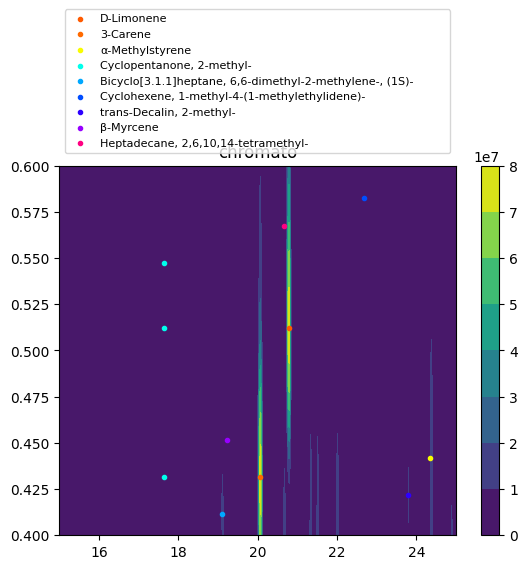

In [157]:
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, casnos_dict=casnos_dictall, points=coordinates_in_chromato, rt1 = 20, rt2 =0.5, rt1_window = 5, rt2_window = 0.1)